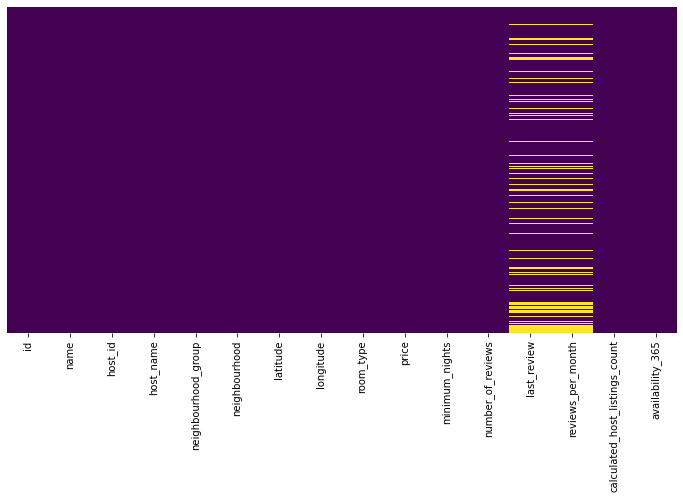

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

airbnb_data = pd.read_csv("AB_NYC_2019 - AB_NYC_2019.csv")
plt.figure(figsize=(12, 6))
sns.heatmap(airbnb_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()


airbnb_data['number_of_reviews'].fillna(airbnb_data['number_of_reviews'].mean(), inplace=True)


airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'])


airbnb_data['last_review_year'] = airbnb_data['last_review'].dt.year

avg_price_neighborhood = airbnb_data.groupby('neighbourhood')['price'].mean()


top_neighborhoods = avg_price_neighborhood.sort_values(ascending=False).head(10)
print(top_neighborhoods)


In [ ]:
import requests
import json

class WeatherAPI:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "http://api.openweathermap.org/data/2.5/"

    def _send_request(self, endpoint, params):
        response = requests.get(self.base_url + endpoint, params=params)
        if response.status_code != 200:
            raise Exception(f"Error: {response.status_code} - {response.text}")
        return response.json()

    def get_current_weather(self, city):
        endpoint = "weather"
        params = {"q": city, "appid": self.api_key, "units": "metric"}
        return self._send_request(endpoint, params)

    def get_forecast(self, city, days=5):
        endpoint = "forecast"
        params = {"q": city, "appid": self.api_key, "units": "metric", "cnt": days}
        return self._send_request(endpoint, params)

    def get_weather_by_coordinates(self, lat, lon):
        endpoint = "weather"
        params = {"lat": lat, "lon": lon, "appid": self.api_key, "units": "metric"}
        return self._send_request(endpoint, params)

    def get_weather_by_zipcode(self, zipcode, country_code='us'):
        endpoint = "weather"
        params = {"zip": f"{zipcode},{country_code}", "appid": self.api_key, "units": "metric"}
        return self._send_request(endpoint, params)

    def get_weather_by_city_id(self, city_id):
        endpoint = "weather"
        params = {"id": city_id, "appid": self.api_key, "units": "metric"}
        return self._send_request(endpoint, params)


api_key = "50fc9762cdd665854f1404eb5b2e5149"
weather_api = WeatherAPI(api_key)


current_weather = weather_api.get_current_weather("New York")
print(json.dumps(current_weather, indent=2))


forecast = weather_api.get_forecast("New York")
print(json.dumps(forecast, indent=2))


coord_weather = weather_api.get_weather_by_coordinates(40.7128, -74.0060)
print(json.dumps(coord_weather, indent=2))


zip_weather = weather_api.get_weather_by_zipcode("10001")
print(json.dumps(zip_weather, indent=2))


city_weather = weather_api.get_weather_by_city_id(5128581)  # New York City ID
print(json.dumps(city_weather, indent=2))
